# 1. Resize and Scale Images 

The operation resize modifies width and height of an image independently, scaling refers to resizing the image same amount horizontally and vertically which keeps the aspect ratio constant.

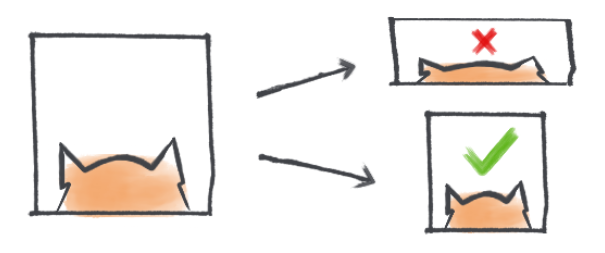

Resizing an image needs a way to calculate pixel values for the new image from the original one. 

There are five such interpolation methods provided by OpenCV:

- INTER_NEAREST – a nearest-neighbor interpolation


- INTER_LINEAR – a bilinear interpolation (used by default)


- INTER_AREA – resampling using pixel area relation. It may be a preferred method for shrinking and downsampling


- INTER_CUBIC – a bicubic interpolation over 4×4 pixel neighborhood


- INTER_LANCZOS4 – a Lanczos interpolation over 8×8 pixel neighborhood (the best one)

Detailed information : https://chadrick-kwag.net/cv2-resize-interpolation-methods/

In [35]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
image = cv2.imread('images/candy.jpg')

In [36]:
cv2.imshow('Original', image)

img_half = cv2.resize(image, (0, 0), fx=0.5, fy=0.5)
cv2.imshow('Half Image', img_half)

img_scale_up = cv2.resize(image, (0, 0), fx=1.5, fy=1.5 , interpolation =cv2.INTER_CUBIC)

cv2.imshow('1.5x Scaling with Inter Cubic', img_scale_up)

img_scale_up2 = cv2.resize(image, (0, 0), fx=1.5, fy=1.5 , interpolation =cv2.INTER_NEAREST)

cv2.imshow('1.5x Scaling with Inter Nearest', img_scale_up2)

img_scale = cv2.resize(image,(900,400), interpolation =cv2.INTER_AREA)
cv2.imshow('Resize 900x400', img_scale)

cv2.waitKey(0)
cv2.destroyAllWindows()

# 2. Image Pyramids

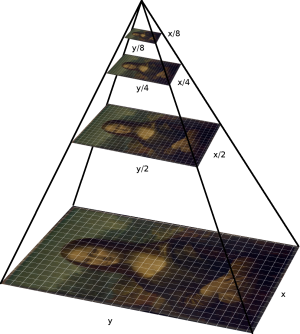

Image pyramid is nothing but a method to display a multi-resolution image. The lowermost layer is a highest-resolution version of image and the topmost layer is a lowest-resolution version of the image. Image pyramids are used to handle image at different scales. 

_source_ : https://www.tutorialspoint.com/java_dip/image_pyramids.htm

In [37]:
def show(title = "", image = None):
    size = 10
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

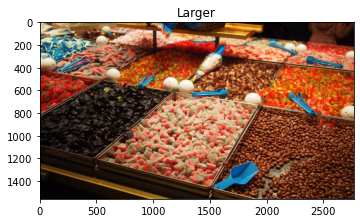

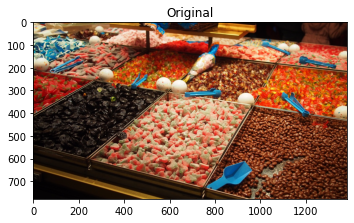

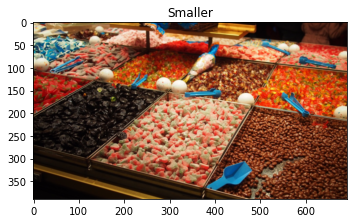

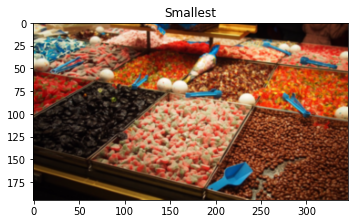

In [38]:
image =cv2.imread('images/candy.jpg')
down = cv2.pyrDown(image)
up = cv2.pyrUp(image)
down_ = cv2.pyrDown(down)

show("Larger",up)
show("Original",image)
show("Smaller",down)
show("Smallest",down_)


# 3. Cropping Images

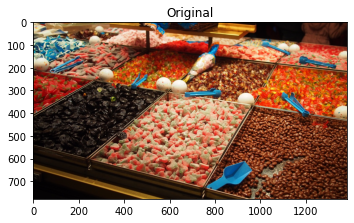

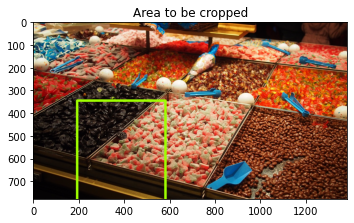

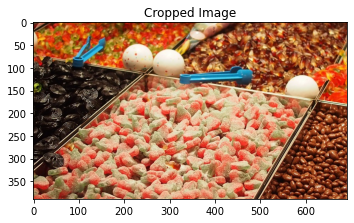

In [39]:
image =cv2.imread('images/candy.jpg')
height, width = image.shape[:2]
start_x , start_y = int(height * 0.25) , int(width*0.25)
end_x , end_y = int(height * 0.75) , int(width*0.75)

image_copy = image.copy()
image_rect = cv2.rectangle(image_copy, (start_x,start_y), (end_x,end_y), (0,255,160), 10)
img_cropped = image[start_x:end_x , start_y:end_y]

show("Original",image)
show("Area to be cropped",image_rect)
show("Cropped Image",img_cropped)

# 4. Image Filtering Using Convolution Operations

A convolution kernel is a 2D matrix that is used to filter images. These kernels can be used to perform mathematical operations on each pixel of an image to achieve a desired effect (ex: blurring,sharpenning)

# Blurring
Blurring is to make something less clear or distinct. 
There are different blurring methods in OpenCV:
- Average blurring : It takes an area of pixels surrounding the central pixel, averagesall these pixels together and replaces the central pixel with the average.


- Gaussian blurring : It is similar to average blurring, but instead of taking a simple mean, now a weighted mean will be used. The pixels which are closer to the central pixels contribute more weight to the average. 


- Median blurring : Replacing the central pixel with the median of neighbourhood. This type of blurring is the most effective against the salt and pepper noise because the centering pixel is always replaced with a pixel intensity which exists in the image.


- Bilateral blurring : When reducing the noise while preserving the edges, bilateral filter can be used. 

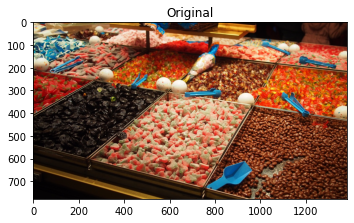

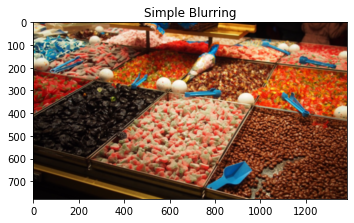

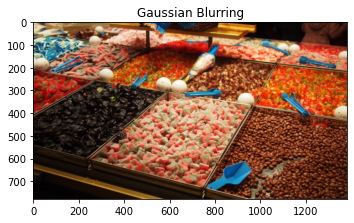

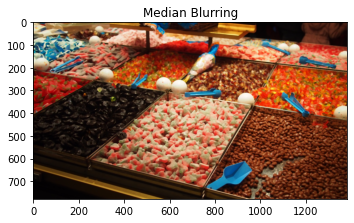

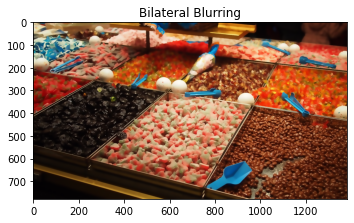

In [40]:
image =cv2.imread('images/candy.jpg')
image_simple = cv2.blur(image,(5,5))
image_gaussian = cv2.GaussianBlur(image,(5,5),0)
image_median = cv2.medianBlur(image,5)
image_bilateral = cv2.bilateralFilter(image,15, 75, 75)

show("Original",image)
show("Simple Blurring",image_simple)
show("Gaussian Blurring",image_gaussian)
show("Median Blurring",image_median)
show("Bilateral Blurring",image_bilateral)

# Sharpening
Image sharpening encompasses any enhancement technique that highlights the edges and fine details of an image.

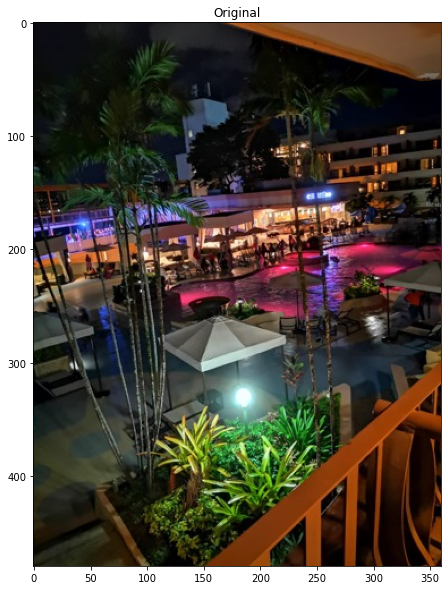

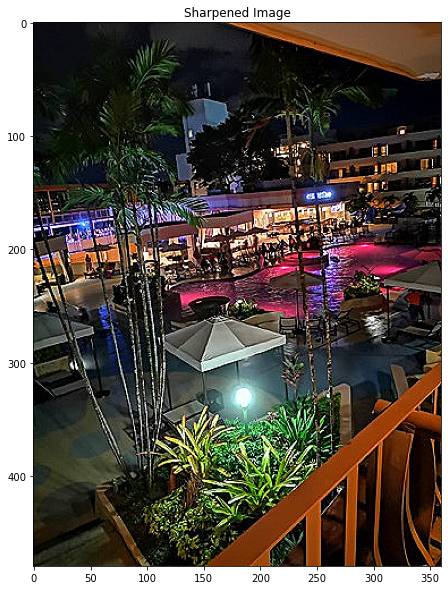

In [42]:
image =cv2.imread('images/hilton.jpeg')
show('Original', image)

# Creating the shapening kernel.
#When creating this kernel, the sum must be 1 
kernel_sharpening = np.array([[0,-1,0], 
                              [-1, 5,-1],
                              [0,-1,0]])

# applying the sharpening kernel to the image
sharpened = cv2.filter2D(image, -1, kernel_sharpening)
show('Sharpened Image', sharpened)